<a href="https://colab.research.google.com/github/RatchanonPa/bsc_dpdm24/blob/main/Chapter_5_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# prompt: connect to ggdrive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd

In [95]:
apndx_data = pd.read_csv('/content/drive/MyDrive/bsc_dpdm24_data/apndx.csv')

In [65]:
apndx_data

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,PID_259996,USA,33,Male,22.3,No,Low,No,No,Diabetes,...,159,7.5,5.2,344,Negative,Moderate,67,Surgery,1.7,No
259996,PID_259997,Australia,45,Female,27.5,Yes,Moderate,Yes,No,Hypertension,...,268,8.0,5.0,195,Negative,Moderate,578,Radiation,0.4,Yes
259997,PID_259998,South Africa,76,Male,27.9,Yes,Moderate,No,No,NaN,...,156,7.8,5.5,201,Positive,Moderate,670,Chemotherapy,0.0,No
259998,PID_259999,China,68,Female,24.0,No,Low,No,No,NaN,...,226,7.9,5.1,386,Negative,Moderate,316,Radiation,8.1,No


In [66]:
apndx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Patient_ID                      260000 non-null  object 
 1   Country                         260000 non-null  object 
 2   Age                             260000 non-null  int64  
 3   Gender                          260000 non-null  object 
 4   BMI                             260000 non-null  float64
 5   Smoking_Status                  260000 non-null  object 
 6   Alcohol_Consumption             260000 non-null  object 
 7   Family_History_Cancer           260000 non-null  object 
 8   Genetic_Mutations               260000 non-null  object 
 9   Chronic_Diseases                129913 non-null  object 
 10  Physical_Activity_Level         260000 non-null  object 
 11  Diet_Type                       260000 non-null  object 
 12  Radiation_Exposu

In [67]:
apndx_data['Chronic_Diseases']

,Chronic_Diseases
0,Diabetes
1,Diabetes
2,Diabetes
3,NaN
4,Hypertension
...,...
259995,Diabetes
259996,Hypertension
259997,NaN
259998,NaN


In [96]:
apndx_data['Chronic_Diseases'] = apndx_data['Chronic_Diseases'].fillna('No')

In [69]:
apndx_data

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,PID_259996,USA,33,Male,22.3,No,Low,No,No,Diabetes,...,159,7.5,5.2,344,Negative,Moderate,67,Surgery,1.7,No
259996,PID_259997,Australia,45,Female,27.5,Yes,Moderate,Yes,No,Hypertension,...,268,8.0,5.0,195,Negative,Moderate,578,Radiation,0.4,Yes
259997,PID_259998,South Africa,76,Male,27.9,Yes,Moderate,No,No,No,...,156,7.8,5.5,201,Positive,Moderate,670,Chemotherapy,0.0,No
259998,PID_259999,China,68,Female,24.0,No,Low,No,No,No,...,226,7.9,5.1,386,Negative,Moderate,316,Radiation,8.1,No


In [70]:
apndx_data[apndx_data['Treatment_Type'].isnull()]

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
16,PID_000017,China,51,Male,16.7,No,Low,No,No,Hypertension,...,293,7.2,4.8,175,Negative,Mild,300,NaN,5.8,No
23,PID_000024,China,64,Female,31.3,No,High,No,No,No,...,166,9.2,4.9,320,Negative,Severe,417,NaN,1.9,No
31,PID_000032,India,83,Female,28.9,No,High,Yes,No,Hypertension,...,271,5.7,4.5,373,Negative,Severe,172,NaN,14.0,No
36,PID_000037,China,34,Male,25.6,No,High,No,No,Hypertension,...,202,7.1,5.2,161,Negative,Moderate,140,NaN,4.0,No
46,PID_000047,China,83,Male,21.1,No,Low,No,No,No,...,272,8.8,5.2,212,Negative,Mild,321,NaN,4.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259945,PID_259946,China,82,Female,30.0,No,Moderate,No,No,No,...,299,8.1,5.4,156,Negative,Moderate,360,NaN,1.9,Yes
259957,PID_259958,Spain,35,Female,32.2,No,Low,No,No,Hypertension,...,150,7.7,4.3,208,Negative,Mild,392,NaN,2.5,No
259974,PID_259975,USA,25,Female,32.0,No,Low,Yes,Yes,No,...,201,8.9,5.7,194,Negative,Mild,38,NaN,1.5,No
259982,PID_259983,India,84,Female,22.6,No,High,No,No,Diabetes,...,255,8.2,5.6,261,Positive,Moderate,326,NaN,1.6,No


In [97]:
apndx_data['Treatment_Type'] = apndx_data['Treatment_Type'].fillna('No')

In [72]:
set(apndx_data['Symptom_Severity'])

{'Mild', 'Moderate', 'Severe'}

In [73]:
apndx_data.groupby(['Symptom_Severity','Appendix_Cancer_Prediction']).count()

Patient_ID  Country     Age  \
Symptom_Severity Appendix_Cancer_Prediction                                
Mild             No                              110229   110229  110229   
                 Yes                              19532    19532   19532   
Moderate         No                               77436    77436   77436   
                 Yes                              13761    13761   13761   
Severe           No                               33048    33048   33048   
                 Yes                               5994     5994    5994   

                                             Gender     BMI  Smoking_Status  \
Symptom_Severity Appendix_Cancer_Prediction                                   
Mild             No                          110229  110229          110229   
                 Yes                          19532   19532           19532   
Moderate         No                           77436   77436           77436   
                 Yes                          13761   13761           13761   
Severe           No                           33048   33048           33048   
                 Yes                           5994    5994            5994   

                                             Alcohol_Consumption  \
Symptom_Severity Appendix_Cancer_Prediction                        
Mild             No                                       110229   
                 Yes                                       19532   
Moderate         No                                        77436   
                 Yes                                       13761   
Severe           No                                        33048   
                 Yes                                        5994   

                                             Family_History_Cancer  \
Symptom_Severity Appendix_Cancer_Prediction                          
Mild             No                                         110229   
                 Yes                                         19532   
Moderate         No                                          77436   
                 Yes                                         13761   
Severe           No                                          33048   
                 Yes                                          5994   

                                             Genetic_Mutations  \
Symptom_Severity Appendix_Cancer_Prediction                      
Mild             No                                     110229   
                 Yes                                     19532   
Moderate         No                                      77436   
                 Yes                                     13761   
Severe           No                                      33048   
                 Yes                                      5994   

                                             Chronic_Diseases  ...  \
Symptom_Severity Appendix_Cancer_Prediction                    ...   
Mild             No                                    110229  ...   
                 Yes                                    19532  ...   
Moderate         No                                     77436  ...   
                 Yes                                    13761  ...   
Severe           No                                     33048  ...   
                 Yes                                     5994  ...   

                                             Previous_Cancers  Blood_Pressure  \
Symptom_Severity Appendix_Cancer_Prediction                                     
Mild             No                                    110229          110229   
                 Yes                                    19532           19532   
Moderate         No                                     77436           77436   
                 Yes                                    13761           13761   
Severe           No                                     33048           33048   
                 Yes                    

## ลบข้อมูลที่รู้หลังจากรู้ว่าเป็นมะเร็งแล้ว

In [98]:
# prompt: drop following column Diagnosis_Delay_Days Treatment_Type Survival_Years_After_Diagnosis

# Drop specified columns
apndx_data = apndx_data.drop(columns=['Diagnosis_Delay_Days', 'Treatment_Type', 'Survival_Years_After_Diagnosis'])
apndx_data

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,No,...,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,No,No,179,236,6.7,4.9,396,Negative,Mild,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,PID_259996,USA,33,Male,22.3,No,Low,No,No,Diabetes,...,No,No,136,159,7.5,5.2,344,Negative,Moderate,No
259996,PID_259997,Australia,45,Female,27.5,Yes,Moderate,Yes,No,Hypertension,...,No,Yes,141,268,8.0,5.0,195,Negative,Moderate,Yes
259997,PID_259998,South Africa,76,Male,27.9,Yes,Moderate,No,No,No,...,No,No,95,156,7.8,5.5,201,Positive,Moderate,No
259998,PID_259999,China,68,Female,24.0,No,Low,No,No,No,...,No,No,107,226,7.9,5.1,386,Negative,Moderate,No


## ลบข้อมูลที่ไม่น่าจะใช้สร้าง model ได้

In [99]:
apndx_data = apndx_data.drop(columns=['Patient_ID', 'Country'])
apndx_data

,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,67,Female,28.6,No,Low,Yes,No,Diabetes,High,Non-Vegetarian,No,No,156,228,8.1,4.4,361,Negative,Mild,Yes
1,83,Female,19.4,No,Low,No,No,Diabetes,Low,Non-Vegetarian,No,No,117,186,9.7,6.2,235,Negative,Moderate,No
2,52,Female,17.2,No,Low,Yes,No,Diabetes,Low,Non-Vegetarian,No,No,115,231,8.2,4.6,269,Negative,Moderate,No
3,71,Male,31.8,Yes,Low,No,No,No,High,Non-Vegetarian,No,Yes,149,151,6.8,6.0,193,Negative,Moderate,No
4,19,Female,17.7,No,Low,No,No,Hypertension,Moderate,Non-Vegetarian,No,No,179,236,6.7,4.9,396,Negative,Mild,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259995,33,Male,22.3,No,Low,No,No,Diabetes,Low,Non-Vegetarian,No,No,136,159,7.5,5.2,344,Negative,Moderate,No
259996,45,Female,27.5,Yes,Moderate,Yes,No,Hypertension,Low,Vegetarian,No,Yes,141,268,8.0,5.0,195,Negative,Moderate,Yes
259997,76,Male,27.9,Yes,Moderate,No,No,No,Low,Non-Vegetarian,No,No,95,156,7.8,5.5,201,Positive,Moderate,No
259998,68,Female,24.0,No,Low,No,No,No,Moderate,Non-Vegetarian,No,No,107,226,7.9,5.1,386,Negative,Moderate,No


In [100]:
apndx_data.shape

(260000, 20)

In [101]:
apndx = apndx_data

## แปลง data ให้เป็นตัวเลขทั้งหมด

In [102]:
# Convert 'Gender' column to numerical values
#apndx['Gender'] = apndx['Gender'].map({'Male': 0, 'Female': 1, 'Other': 2})

# Convert 'Smoking_Status' to numerical values
apndx['Smoking_Status'] = apndx['Smoking_Status'].map({'No': 0, 'Yes': 1})

# Convert 'Alcohol_Consumption' to numerical values
apndx['Alcohol_Consumption'] = apndx['Alcohol_Consumption'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Convert 'Family_History_Cancer' to numerical values
apndx['Family_History_Cancer'] = apndx['Family_History_Cancer'].map({'No': 0, 'Yes': 1})

# Convert 'Genetic_Mutations' to numerical values
apndx['Genetic_Mutations'] = apndx['Genetic_Mutations'].map({'No': 0, 'Yes': 1})

# Convert 'Chronic_Diseases' to numerical values
#apndx['Chronic_Diseases'] = apndx['Chronic_Diseases'].map({'No': 0, 'Diabetes': 1, 'Hypertension': 2})

# Convert 'Physical_Activity_Level' to numerical values
apndx['Physical_Activity_Level'] = apndx['Physical_Activity_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Convert 'Diet_Type' to numerical values
#apndx['Diet_Type'] = apndx['Diet_Type'].map({'Poor': 0, 'Average': 1, 'Good': 2})

# Convert 'Radiation_Exposure' to numerical values
apndx['Radiation_Exposure'] = apndx['Radiation_Exposure'].map({'No': 0, 'Yes': 1})

# Convert 'Previous_Cancers' to numerical values
apndx['Previous_Cancers'] = apndx['Previous_Cancers'].map({'No': 0, 'Yes': 1})

# Convert 'Tumor_Markers' to numerical values
apndx['Tumor_Markers'] = apndx['Tumor_Markers'].map({'Negative': 0, 'Positive': 1})

# Convert 'Symptom_Severity' to numerical values
apndx['Symptom_Severity'] = apndx['Symptom_Severity'].map({'Mild': 0, 'Moderate': 1, 'Severe': 2})

# Convert 'Appendix_Cancer_Prediction' to numerical values
apndx['Appendix_Cancer_Prediction'] = apndx['Appendix_Cancer_Prediction'].map({'No': 0, 'Yes': 1})

apndx.head(10)


,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,Physical_Activity_Level,Diet_Type,Radiation_Exposure,Previous_Cancers,Blood_Pressure,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Appendix_Cancer_Prediction
0,67,Female,28.6,0,0,1,0,Diabetes,2,Non-Vegetarian,0,0,156,228,8.1,4.4,361,0,0,1
1,83,Female,19.4,0,0,0,0,Diabetes,0,Non-Vegetarian,0,0,117,186,9.7,6.2,235,0,1,0
2,52,Female,17.2,0,0,1,0,Diabetes,0,Non-Vegetarian,0,0,115,231,8.2,4.6,269,0,1,0
3,71,Male,31.8,1,0,0,0,No,2,Non-Vegetarian,0,1,149,151,6.8,6.0,193,0,1,0
4,19,Female,17.7,0,0,0,0,Hypertension,1,Non-Vegetarian,0,0,179,236,6.7,4.9,396,0,0,0
5,44,Male,21.2,0,0,0,1,Hypertension,0,Vegetarian,0,0,113,270,6.9,4.9,397,0,0,0
6,43,Female,26.4,0,0,1,0,No,0,Non-Vegetarian,1,0,144,224,10.3,4.6,355,0,1,1
7,87,Female,21.3,0,1,0,0,No,0,Non-Vegetarian,0,0,94,194,6.2,4.5,375,0,1,0
8,60,Male,19.7,0,2,0,0,No,0,Vegetarian,0,1,113,165,6.3,4.9,277,0,2,0
9,47,Male,20.1,1,2,0,0,Hypertension,1,Non-Vegetarian,1,0,147,266,6.4,5.5,218,0,0,0


In [83]:
apndx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         260000 non-null  int64  
 1   Gender                      260000 non-null  object 
 2   BMI                         260000 non-null  float64
 3   Smoking_Status              260000 non-null  int64  
 4   Alcohol_Consumption         260000 non-null  int64  
 5   Family_History_Cancer       260000 non-null  int64  
 6   Genetic_Mutations           260000 non-null  int64  
 7   Chronic_Diseases            260000 non-null  object 
 8   Physical_Activity_Level     260000 non-null  int64  
 9   Diet_Type                   260000 non-null  object 
 10  Radiation_Exposure          260000 non-null  int64  
 11  Previous_Cancers            260000 non-null  int64  
 12  Blood_Pressure              260000 non-null  int64  
 13  Cholesterol_Le

In [103]:
# prompt: transform Gender Chronic_Diseases  Diet_Type  using one-hot-endcoder

from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder on the categorical columns
encoder.fit(apndx[['Gender', 'Chronic_Diseases', 'Diet_Type']])

# Transform the categorical columns into one-hot encoded features
encoded_features = encoder.transform(apndx[['Gender', 'Chronic_Diseases', 'Diet_Type']])

# Create a new DataFrame with the one-hot encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['Gender', 'Chronic_Diseases', 'Diet_Type']))

# Concatenate the encoded features with the original DataFrame
apndx = pd.concat([apndx, encoded_df], axis=1)

# Drop the original categorical columns
apndx = apndx.drop(['Gender', 'Chronic_Diseases', 'Diet_Type'], axis=1)

apndx.head(10)


,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Appendix_Cancer_Prediction,Gender_Female,Gender_Male,Gender_Other,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
0,67,28.6,0,0,1,0,2,0,0,156,...,1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,83,19.4,0,0,0,0,0,0,0,117,...,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,52,17.2,0,0,1,0,0,0,0,115,...,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,71,31.8,1,0,0,0,2,0,1,149,...,0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,19,17.7,0,0,0,0,1,0,0,179,...,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,44,21.2,0,0,0,1,0,0,0,113,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,43,26.4,0,0,1,0,0,1,0,144,...,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7,87,21.3,0,1,0,0,0,0,0,94,...,0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,60,19.7,0,2,0,0,0,0,1,113,...,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
9,47,20.1,1,2,0,0,1,1,0,147,...,0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [91]:
# mapping = {'Yes':1, 'No':0}
# apndx['Appendix_Cancer_Prediction'] = apndx['Appendix_Cancer_Prediction'].map(mapping)
# apndx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260000 entries, 0 to 259999
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Age                            260000 non-null  int64  
 1   BMI                            260000 non-null  float64
 2   Smoking_Status                 260000 non-null  int64  
 3   Alcohol_Consumption            260000 non-null  int64  
 4   Family_History_Cancer          260000 non-null  int64  
 5   Genetic_Mutations              260000 non-null  int64  
 6   Physical_Activity_Level        260000 non-null  int64  
 7   Radiation_Exposure             260000 non-null  int64  
 8   Previous_Cancers               260000 non-null  int64  
 9   Blood_Pressure                 260000 non-null  int64  
 10  Cholesterol_Level              260000 non-null  int64  
 11  White_Blood_Cell_Count         260000 non-null  float64
 12  Red_Blood_Cell_Count          

# เก็บ Test ไว้วัดผลตอนจบ

In [104]:
# prompt: random sampling 60000 data and also keep the rest

from sklearn.model_selection import train_test_split

# Assuming 'apnx_data' is your DataFrame
# Split the data into two parts: a sample of 60000 and the rest
train_data, test_data = train_test_split(apndx, train_size=200000, random_state=6)

# 'sample_data' will contain 60000 randomly sampled rows
# 'rest_data' will contain the remaining rows
print("Sample Data shape:", train_data.shape)
print("Rest Data shape:", test_data.shape)


Sample Data shape: (200000, 26)
Rest Data shape: (60000, 26)


### ดูว่า test-train มีการกระจายคล้ายกันมั้ย

In [105]:
train_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Gender_Female,Gender_Male,Gender_Other,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786,...,169786,169786,169786,169786,169786,169786,169786,169786,169786,169786
1,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214,...,30214,30214,30214,30214,30214,30214,30214,30214,30214,30214


In [106]:
30214/169786

0.17795342372162604

In [107]:
test_data.groupby(['Appendix_Cancer_Prediction']).count()

,Age,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Physical_Activity_Level,Radiation_Exposure,Previous_Cancers,Blood_Pressure,...,Symptom_Severity,Gender_Female,Gender_Male,Gender_Other,Chronic_Diseases_Diabetes,Chronic_Diseases_Hypertension,Chronic_Diseases_No,Diet_Type_Non-Vegetarian,Diet_Type_Vegan,Diet_Type_Vegetarian
Appendix_Cancer_Prediction,,,,,,,,,,,,,,,,,,,,,
0,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927,...,50927,50927,50927,50927,50927,50927,50927,50927,50927,50927
1,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073,...,9073,9073,9073,9073,9073,9073,9073,9073,9073,9073


In [108]:
9073/50927

0.17815696978027373

# เลือก Model ที่ดีที่สุด (Model Selection)



1.   Decision Tree
2.   Short Decision Tree
3.   Naive Bayes



### แบ่ง data เป็น 10 ก้อน

In [109]:
# Define K-fold cross-validation
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=6)

In [112]:
X_train = train_data.drop('Appendix_Cancer_Prediction', axis = 1)
y_train = train_data['Appendix_Cancer_Prediction']

## Decision Tree

In [113]:
# import
from sklearn.tree import DecisionTreeClassifier
# define
dt_classifier = DecisionTreeClassifier() # default
# train & # evaluate(cross validation).
cv_scores = cross_val_score(dt_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [115]:
# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())
print("Standard deviation of cross-validation scores:", cv_scores.std())

Cross-validation scores: [0.7232  0.7241  0.72495 0.7212  0.72225 0.72045 0.72205 0.72435 0.72415
 0.7233 ]
Average cross-validation score: 0.723
Standard deviation of cross-validation scores: 0.0013962449641807145


## Short Decision Tree

In [116]:
#import
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifier2 = DecisionTreeClassifier(max_depth=5)
#cross
cv_scores2 = cross_val_score(dt_classifier2, X_train, y_train, cv=kf, scoring='accuracy')

In [118]:
# Print cross-validation results
print("Cross-validation scores:", cv_scores2)
print("Average cross-validation score:", cv_scores2.mean())
print("Standard deviation of cross-validation scores:", cv_scores2.std())

Cross-validation scores: [0.8491  0.84865 0.84905 0.84875 0.849   0.8506  0.84955 0.8494  0.84525
 0.8493 ]
Average cross-validation score: 0.848865
Standard deviation of cross-validation scores: 0.001311115936902628


## Naive Bayes

In [119]:
#import
from sklearn.naive_bayes import GaussianNB
#define
nb_classifier = GaussianNB()
#cross
cv_scores3 = cross_val_score(nb_classifier, X_train, y_train, cv=kf, scoring='accuracy')

In [120]:
# Print cross-validation results
print("Cross-validation scores:", cv_scores3)
print("Average cross-validation score:", cv_scores3.mean())
print("Standard deviation of cross-validation scores:", cv_scores3.std())

Cross-validation scores: [0.84915 0.84865 0.8491  0.8473  0.84905 0.8506  0.84955 0.8496  0.8454
 0.8494 ]
Average cross-validation score: 0.84878
Standard deviation of cross-validation scores: 0.0013749909090608461


## เลือก Short Dicision Tree มา train ด้วย all training data

In [121]:
#import
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifier2 = DecisionTreeClassifier(max_depth=5)

dt_classifier2 = dt_classifier2.fit(X_train, y_train)

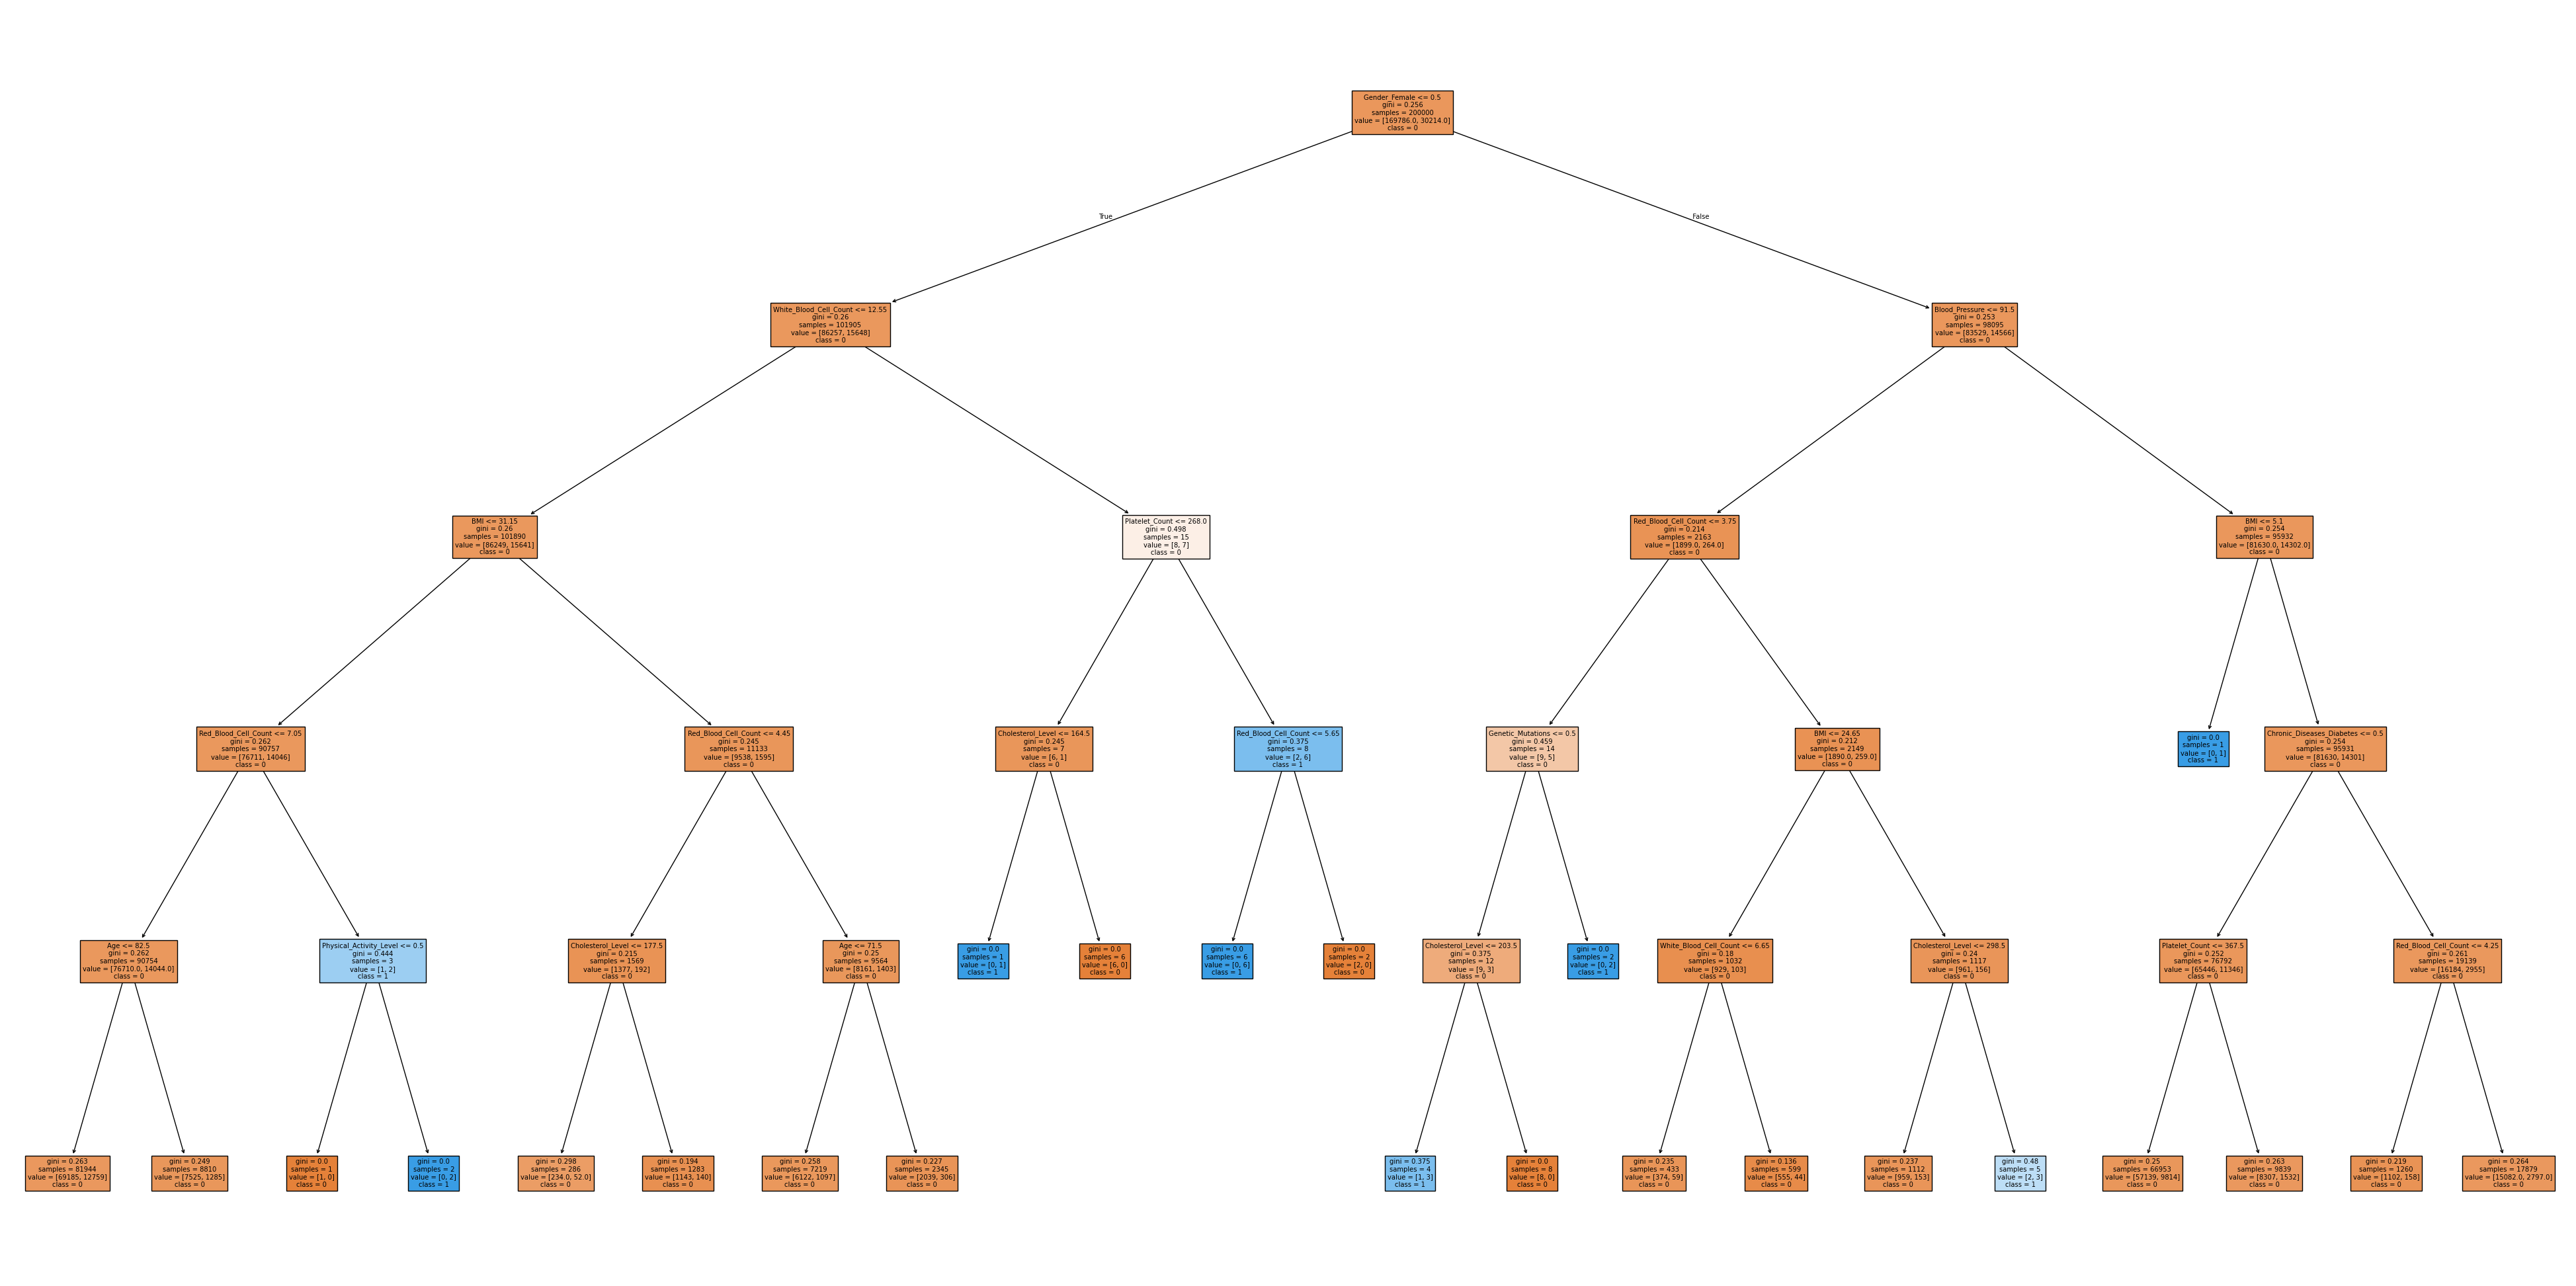

In [122]:
# prompt: plot the trained

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming dt_classifier2 is your trained DecisionTreeClassifier
plt.figure(figsize=(50,25))
plot_tree(dt_classifier2, filled=True, feature_names=X_train.columns, class_names=['0','1'])
plt.show()

# Evaluate with Test data

In [123]:
X_test = test_data.drop('Appendix_Cancer_Prediction', axis = 1)
y_actual = test_data['Appendix_Cancer_Prediction']

In [124]:
# Predict
y_pred = dt_classifier2.predict(X_test)

In [125]:
# Evaluate
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_actual, y_pred)
print(f"Accuracy on test data: {accuracy}")

Accuracy on test data: 0.8487166666666667


# Quiz 12 หาต้นไม้ตัดสินใจที่มี average cross-validation accuracy มากกว่า 84.887%

In [154]:
#import
from sklearn.tree import DecisionTreeClassifier
#define
dt_classifierq = DecisionTreeClassifier(max_depth=1, random_state=6)

#cross
cv_scoresq = cross_val_score(dt_classifierq, X_train, y_train, cv=kf, scoring='accuracy')
# Print cross-validation results
print("Cross-validation scores:", cv_scoresq)
print("Average cross-validation score:", cv_scoresq.mean())
print("Standard deviation of cross-validation scores:", cv_scoresq.std())

Cross-validation scores: [0.84915 0.84865 0.8491  0.8488  0.84905 0.8506  0.84955 0.8496  0.8454
 0.8494 ]
Average cross-validation score: 0.8489299999999999
Standard deviation of cross-validation scores: 0.0012841728855570752
